<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Lecture_5_Part_1_of_Model_Selection_and_Goodness_of_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Goodness of Fit
## Part 1 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 05.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import bootstrap 

In [ ]:
X = np.array([0.2, -0.1, 0.5, 0.3, -0.6])

from sklearn.utils import resample


def bsSamples(x,n):

  samples = []
  for i in range(n):
    rand = i
    samples.append(resample(x, random_state=i, n_samples=len(x)))

  return samples

n = 10

samples = bsSamples(X,n)

for i in samples:
  print(i)

[-0.6  0.2  0.3  0.3  0.3]
[ 0.3 -0.6  0.2 -0.1  0.3]
[0.2 0.2 0.3 0.5 0.3]
[ 0.5  0.2 -0.1  0.3  0.2]
[ 0.5 -0.1  0.2  0.2  0.5]
[ 0.3  0.2 -0.1  0.2 -0.6]
[ 0.5 -0.1  0.3 -0.6  0.5]
[-0.6 -0.1  0.3  0.3 -0.6]
[ 0.3 -0.6 -0.1 -0.1  0.5]
[-0.6  0.2  0.3 -0.1 -0.6]


Graphs of Distribution and Fits



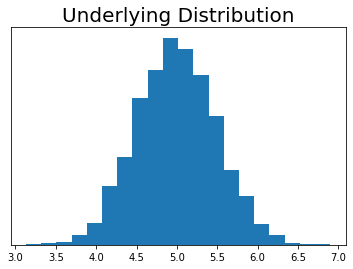

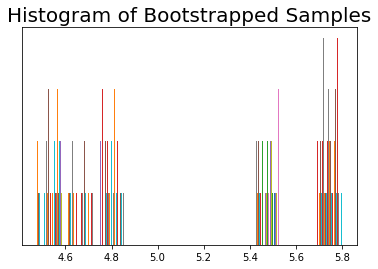

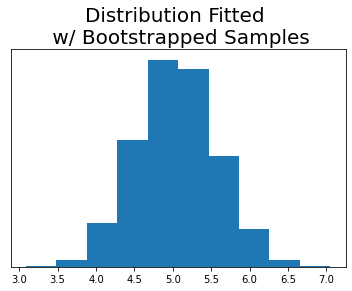

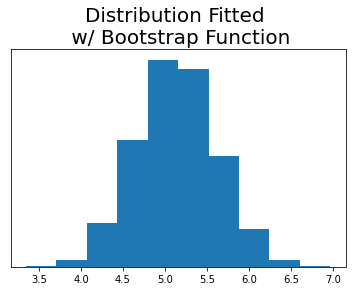




Sample choosen from underlying distribution:
 [[5.81217268 4.69412179 4.73591412 4.46351569 5.43270381]]

After creating bootstraped samples we can fit a normal distribution using the synthetic samples
 Fit mean:  5.0532328309175085 
Fit standard deviation:  0.5254439121080979

We can also use a bootstraping method created by scipy
 We parse in one sample and here are the results:

Confidence Interval for mean:
 ConfidenceInterval(low=4.664717504601677, high=5.61962723662882) 

 Confidence Interval for standard deviation:
 ConfidenceInterval(low=0.347478766444474, high=0.6140898747034693)

We can take the true value of these statistics to be  in the middle of the distribution: 
 Bootstrapped mean:  5.142172370615249 
Bootsrapped standard deviation:  0.4807843205739717


In [ ]:
mu = 5
sig = 1/2
rv = norm(loc = mu, scale = sig)
x = rv.rvs(5000,random_state=0)

sample = rv.rvs(5,random_state=1)


n = 100
samples = bsSamples(sample,n)

loc, scale = norm.fit(samples)
rv2 = norm(loc, scale)
x2 = rv2.rvs(5000,random_state=0)

sample = np.reshape(sample,(1,len(sample)))
bsMeanIN = bootstrap(sample,np.mean,n_resamples=n)
bsSdevIN = bootstrap(sample,np.std,n_resamples=n)

## choosing middle of confidence interval for true value

bsMean = (bsMeanIN.confidence_interval[1] + bsMeanIN.confidence_interval[0])/2
bsSdev = (bsSdevIN.confidence_interval[1] + bsSdevIN.confidence_interval[0])/2

rv3 = norm(bsMean, bsSdev)
x3 = rv3.rvs(5000,random_state=0)




print("Graphs of Distribution and Fits\n")

plt.figure(1)
plt.hist(x,bins=20)
plt.title("Underlying Distribution",fontsize=20)
plt.yticks([])
plt.show()

print("\n\n")

plt.figure(2)
plt.hist(samples)
plt.title("Histogram of Bootstrapped Samples",fontsize=20)
plt.yticks([])
plt.show()

print("\n\n")

plt.figure(3)
plt.hist(x2)
plt.title("Distribution Fitted \n w/ Bootstrapped Samples",fontsize=20)
plt.yticks([])
plt.show()

print("\n\n")

plt.figure(4)
plt.hist(x3)
plt.title("Distribution Fitted \n w/ Bootstrap Function",fontsize=20)
plt.yticks([])
plt.show()

print("\n\n")

print("Sample choosen from underlying distribution:\n",sample)

print("\nAfter creating bootstraped samples we can fit a", 
      "normal distribution using the synthetic samples\n",
      "Fit mean: ",loc,
      "\nFit standard deviation: ",scale)

print("\nWe can also use a bootstraping method created by scipy\n",
      "We parse in one sample and here are the results:\n")

print("Confidence Interval for mean:\n",
      bsMeanIN.confidence_interval,'\n\n',
      "Confidence Interval for standard deviation:\n",
      bsSdevIN.confidence_interval)

print("\nWe can take the true value of these statistics to be",
      "in the middle of the distribution: \n", 
      "Bootstrapped mean: ", bsMean,
      "\nBootsrapped standard deviation: ",bsSdev)



https://scikit-learn.org/stable/modules/cross_validation.html


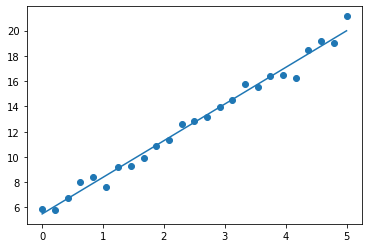

6.588571574285596 43.40927538948418 -31.338481410161386 -30.119605585293186


In [ ]:
from sklearn import linear_model

np.random.seed(0)

n = 25
x = np.reshape(np.linspace(0,5,n),(n,1))

y = 3*x + 5 + np.random.normal(0,0.5,np.shape(x))

plt.scatter(x,y)

reg = linear_model.LinearRegression()


reg.fit(x,y)

reg.coef_

yfit = reg.predict(x)

plt.plot(x,yfit)

plt.show()

## Same model testing functions used in previous lectures

def residual(y,yfit):

  e = np.square(y-yfit)

  R = np.sum(e)

  return R


def r2Adj(R2,M,y):

  R2 = R2**2

  n = len(y)

  return ((n - 1)*R2 - (M - 1))/(n - M)

def AIC(R2,M,y):

  n = len(y)

  return n*np.log(R2/n) + 2*M

def BIC(R2,M,y):

  n = len(y)

  return n*np.log(R2/n) + M*np.log(n)


R2 = residual(y,yfit)

R2a = r2Adj(R2,1,y)

A = AIC(R2,1,y)

S = BIC(R2,1,y)

print(R2,R2a,A,S)

